In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from torch import nn
import numpy as np
import torch

from unityagents import UnityEnvironment
from src.model.ddpg.agent import DDPGAgent
from src.model.ddpg.trainer import DDPGTrainer

In [2]:
env = UnityEnvironment(file_name="unity/Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
agent = DDPGAgent(env, network_config={
    'actor_hidden_sizes':[256, 128], 
    'critic_hidden_sizes':[256, 128],})
agent.policy.pi, agent.policy.V

(Actor(
   (layers): ModuleList(
     (0): Linear(in_features=24, out_features=256, bias=True)
     (1): ReLU()
     (2): Linear(in_features=256, out_features=128, bias=True)
     (3): ReLU()
     (4): Linear(in_features=128, out_features=2, bias=True)
     (5): Tanh()
   )
 ),
 Critic(
   (layers): ModuleList(
     (0): Linear(in_features=24, out_features=256, bias=True)
     (1): LeakyReLU(negative_slope=0.01)
     (2): Linear(in_features=258, out_features=128, bias=True)
     (3): LeakyReLU(negative_slope=0.01)
     (4): Linear(in_features=128, out_features=1, bias=True)
   )
 ))

INFO:src.model.ddpg.trainer:	------------------------------ Training ------------------------------
INFO:src.model.ddpg.trainer:	N Episodes 3000 , max length episode: 1000
INFO:src.model.ddpg.trainer:	Target score: 0.6
INFO:src.model.ddpg.trainer:	----------------------------------------------------------------------
Episode 2875 Score: 2.60, 100 episode Mean Score: 0.62:  96%|█████████▌| 2874/3000 [35:48<01:34,  1.34it/s]  
INFO:src.model.ddpg.trainer:	Training Finished at episode 2875 - Mean Score: 0.62


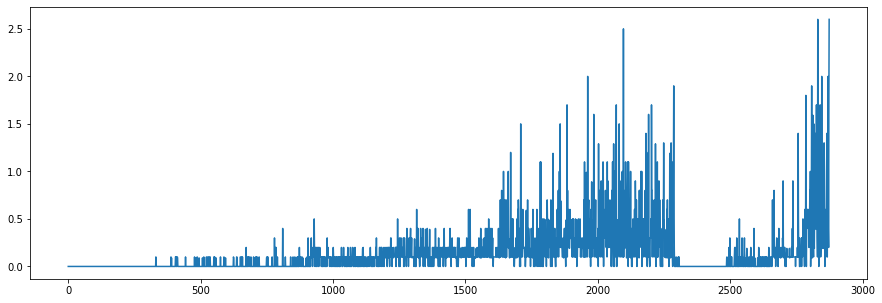

In [4]:
trainer = DDPGTrainer(agent, gamma=0.99, 
                      learning_rate_actor=1e-4, 
                      learning_rate_critic=1e-4,replaybuffer_type='base')
# trainer.toggle_debug()
trained_agent = trainer.train(
    n_episodes=3000, 
    max_steps_per_episode=1000,
    target=0.6
    )
fig, ax = plt.subplots(figsize=(15, 5), nrows=1)
ax.plot(trainer.scores)

plt.show()

In [7]:
agent.run_test_episode(track_progress=True)

Mean Cumulative Reward: 2.65: 100%|██████████| 1000/1000 [01:40<00:00,  9.94it/s]


array([[2.70000004, 2.60000004]])